# Unsupervised Learning

Unsupervised learning is a type of machine learning where the goal is to find patterns or relationships in a dataset without explicit labels or guidance from a teacher. Unlike supervised learning, there is no target variable to predict, and the algorithm must instead identify patterns and relationships on its own.

### Course Book Information
For more information on unsupervised learning and clustering, refer to Chapter 9 of the course book. This chapter covers the basics of unsupervised learning, including clustering algorithms such as k-means and hierarchical clustering.



## Clustering
Clustering is a type of unsupervised learning where the goal is to group similar data points together into clusters based on some similarity metric or distance function. The algorithm does not have prior knowledge of the number of clusters, and it must discover them on its own.

First, let's prepare the dataset.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.style.use("dark_background")

In [ ]:
def get_features(n_clus=5, random_state=42, thr=2.0, N=500, lvl=0.45):
  X_c = []
  n = 0
  while n < n_clus:
    if n == 0:
      X_c.append(np.random.rand(2)*6-3)
      n = n+1
    else:
      insert = False
      while insert is False:
        insert = True
        x_p = np.random.rand(2)*6-3
        for i, x in enumerate(X_c):
          d = np.linalg.norm(x - x_p)
          if d < thr:
            insert = False
            break
      X_c.append(x_p)
      n = n+1
    
  radii = np.random.rand(N)*thr*lvl
  thetas = np.random.rand(N)*np.pi*2
  idx = np.random.randint(0, n_clus, N)
  shf = np.array([X_c[i] for i in idx])
  pos = np.array([radii * np.cos(thetas), radii * np.sin(thetas)]).T
  X = shf + pos
  return np.array(X_c), X

X_c, X = get_features()

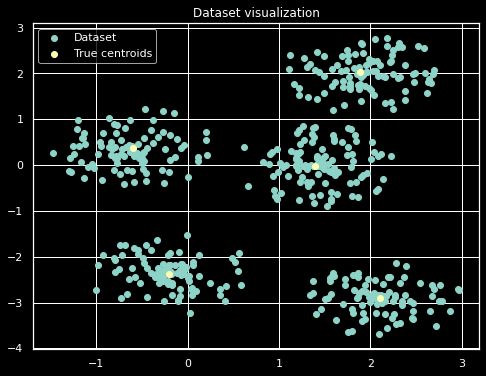

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(X.T[0], X.T[1], label="Dataset")
ax.scatter(X_c.T[0], X_c.T[1], label="True centroids")
ax.set_title("Dataset visualization")
ax.legend()

fig.show()

### KMeans Algorithm
KMeans is a popular clustering algorithm that seeks to partition a dataset into a predetermined number of clusters (K). It is an iterative algorithm that works by randomly selecting K data points as the initial cluster centers and then iteratively optimizing the cluster centers until convergence.

The algorithm works as follows:

1. Initialize K cluster centers randomly from the dataset.
2. Assign each data point to its nearest cluster center.
3. Recalculate the cluster centers by taking the mean of all data points assigned to that cluster.
4. Repeat steps 2 and 3 until convergence or a maximum number of iterations is reached.

The KMeans algorithm can be used to solve a variety of problems, such as customer segmentation, image compression, and anomaly detection. However, it has some limitations, such as being sensitive to initial conditions and struggling with clusters of different sizes and densities.

Overall, KMeans is a powerful and widely used algorithm in the field of unsupervised learning and clustering, and it can provide valuable insights into the structure of a dataset.

In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
y_pred = kmeans.fit_predict(X)

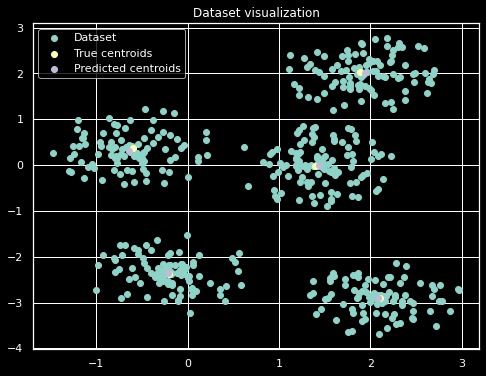

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

X_c_pred = kmeans.cluster_centers_

ax.scatter(X.T[0], X.T[1], label="Dataset")
ax.scatter(X_c.T[0], X_c.T[1], label="True centroids")
ax.scatter(X_c_pred.T[0], X_c_pred.T[1], label="Predicted centroids")
ax.set_title("Dataset visualization")
ax.legend()

fig.show()

#### Extra: coloring the points according to the label

1. Transform the dataset in a Pandas DF
2. Plot with Seaborn

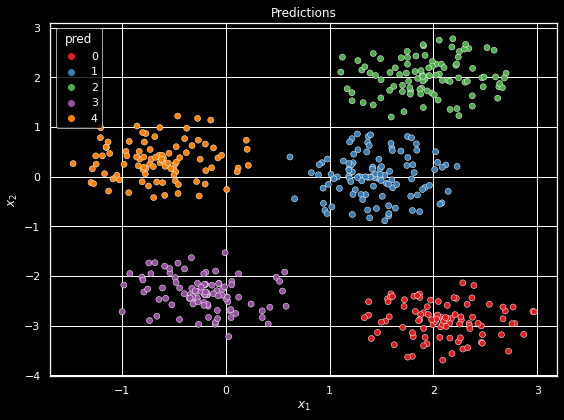

In [ ]:
#@title Code

df = pd.DataFrame(X, columns=["x1", "x2"])
df['pred'] = y_pred

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=df, x='x1', y='x2', hue='pred', palette='Set1', ax=ax)
ax.set_title("Predictions")

ax.set_xlabel(f"$x_1$")
ax.set_ylabel(f"$x_2$")

fig.tight_layout()
fig.show()

#### Inertia

Inertia is a metric used in KMeans clustering to evaluate the quality of the resulting clusters. Inertia measures the sum of squared distances between each data point and its closest centroid, which can be thought of as a measure of how spread out the data points are within each cluster.

Therefore in the context of KMeans we'll employ the *negative* inertia as score.

Question: why negative?

Answer: the rule for the score is the *greater the better*.

In [ ]:
kmeans.score(X)

-133.85592419129722

#### Silhouette
Another approach is to look at the _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. An instance's silhouette coefficient is equal to:

$(b - a)/\max(a, b)$ 

where:

* $a$ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_);

* $b$ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster.

The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6871037220591533

### Scores to tune the parameters

What is the best $k$ (the *number of clusters*) to pick?

#### Elbow method
Let's try to plot the score against $k$

Text(0, 0.5, '$Inertia$')

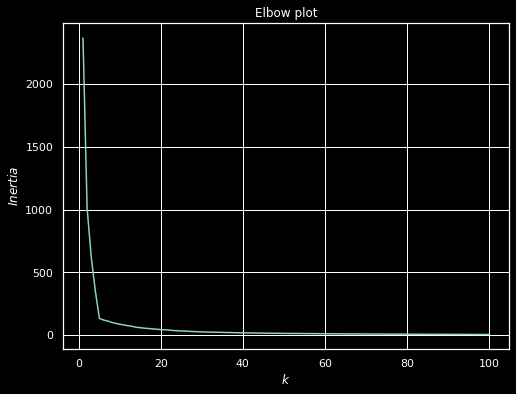

In [ ]:
N_max = 100
k_i = [n for n in range(1,N_max+1)]
scores = np.empty(N_max)

for i, k in enumerate(k_i):

  kmeans_ = KMeans(n_clusters=k, init='k-means++', n_init=10)
  y_pred = kmeans_.fit_predict(X)
  scores[i] = -kmeans_.score(X)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(k_i, scores)
ax.set_title("Elbow plot")
ax.set_xlabel(f"$k$")
ax.set_ylabel(f"$Inertia$")

fig.show()

The largest k, the smaller the Inertia. Well, this should be obvious: as we approach the number of the feature vectors (i.e. the size of the dataset) each centroid can be set on the feature vector.
Let's see again the plot in the interval $k \in [1,10]$

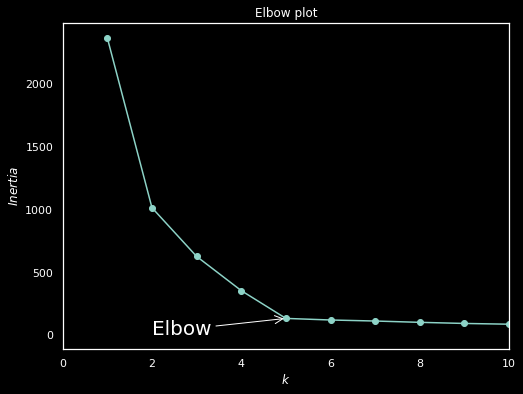

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(k_i, scores)
ax.scatter(k_i, scores)
ax.set_title("Elbow plot")
ax.set_xlabel(f"$k$")
ax.set_ylabel(f"$Inertia$")
ax.set_xlim(0,10)

ax.grid(visible=False)

ax.annotate("Elbow", xy=(5, scores[4]), xytext=(2, 0),
            arrowprops=dict(arrowstyle="->"), fontsize=20)


fig.show()

The Elbow method involves the following steps:

1. Cluster the dataset using a clustering algorithm such as k-means, hierarchical clustering, or DBSCAN.
2. Calculate the WSS for each cluster by summing the squared distance between each point and its assigned cluster center.
3. Plot the WSS against the number of clusters.
4. Identify the "elbow" of the curve where the rate of decrease in WSS starts to flatten out.
5. Choose the number of clusters at the elbow point as the optimal number of clusters for the dataset.

In general, a small number of clusters may result in overly simplified or homogeneous clusters, while a large number of clusters may result in overfitting or noisy clusters. Therefore, it is important to balance the trade-off between the complexity of the clustering model and the accuracy of the clustering results.

#### Silhouette Diagram

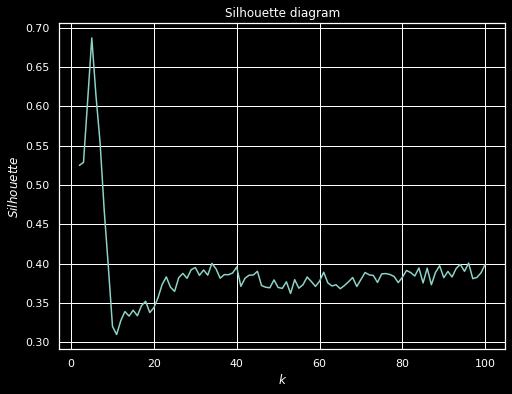

In [ ]:
N_max = 100
k_i = [n for n in range(2,N_max+1)]
scores = np.empty(N_max-1)

for i, k in enumerate(k_i):

  kmeans_ = KMeans(n_clusters=k, init='k-means++', n_init=10)
  y_pred = kmeans_.fit_predict(X)
  scores[i] = silhouette_score(X, kmeans_.labels_)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(k_i, scores)
ax.set_title("Silhouette diagram")
ax.set_xlabel(f"$k$")
ax.set_ylabel(f"$Silhouette$")

fig.show()

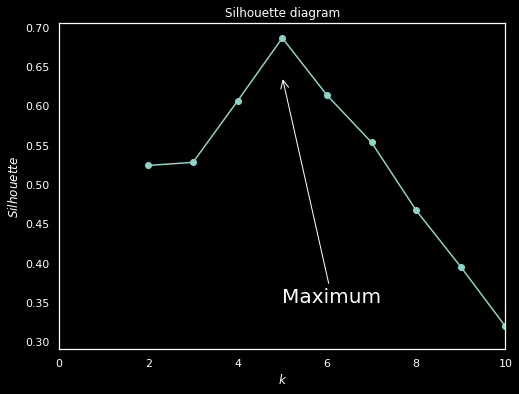

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(k_i, scores)
ax.scatter(k_i, scores)
ax.set_title("Silhouette diagram")
ax.set_xlabel(f"$k$")
ax.set_ylabel(f"$Silhouette$")
ax.set_xlim(0,10)

ax.grid(visible=False)

ax.annotate("Maximum", xy=(5, scores[3] - 0.05), xytext=(5, 0.35),
            arrowprops=dict(arrowstyle="->"), fontsize=20)


fig.show()

### MiniBatch

Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of 3 or 4 and makes it
possible to cluster huge datasets that do not fit in memory.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
y_pred = kmeans.fit_predict(X)

#### Comparison

In [ ]:
from timeit import timeit

In [ ]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42, n_init=10)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=10)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

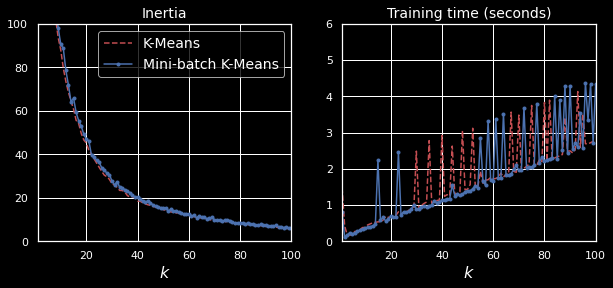

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

### DBSCAN Algorithm
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together data points that are close to each other based on a density criterion. Unlike the KMeans algorithm, DBSCAN does not require the number of clusters to be specified beforehand and can discover clusters of different shapes and sizes.

The algorithm works as follows:

1. Choose an arbitrary unvisited data point and determine its neighborhood of other data points within a radius epsilon.
2. If the number of data points within the epsilon radius is greater than or equal to the minimum number of points required to form a cluster, then create a new cluster and add all the data points within the epsilon radius to the cluster.
3. Expand the cluster by iterating through all of the neighboring data points within the epsilon radius and adding any unvisited points to the cluster.
4. Repeat steps 1-3 until all data points have been visited.

The DBSCAN algorithm can identify noise points, which are points that do not belong to any cluster. The algorithm can also identify border points, which are points that are within the epsilon radius of a cluster but are not density-reachable by any other cluster.

DBSCAN has several advantages over KMeans, such as being able to handle clusters of different sizes and shapes and being less sensitive to initial conditions. However, it has some limitations, such as being sensitive to the choice of hyperparameters and struggling with high-dimensional datasets.

Overall, DBSCAN is a powerful clustering algorithm that can provide valuable insights into the structure of a dataset and is commonly used in a variety of applications, such as anomaly detection and image segmentation.

<Axes: xlabel='x1', ylabel='x2'>

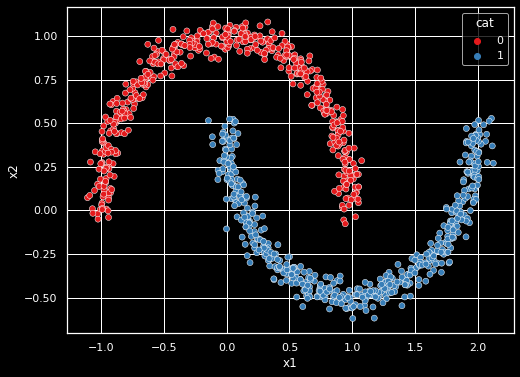

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

fig, ax = plt.subplots(figsize=(8,6))

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['cat'] = y

sns.scatterplot(data=df, x='x1', y='x2', hue='cat', palette='Set1')

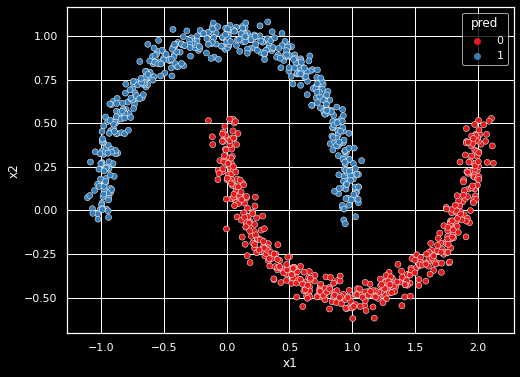

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=2)
dbscan.fit(X)

df['pred'] = dbscan.labels_

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x='x1', y='x2', hue='pred', palette='Set1', ax=ax)
fig.show()

... best idea is to use your eyes.